# **Impression Analytics for Campaign Cost as per User Behaviour**

#**Code has been divided into two parts**


### 1.   Data Cleaning & Visualisation
### 2.   Data Modelling & Machine Learning


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/BDA\ -\ Semester\ Project

/content/gdrive/MyDrive/BDA - Semester Project


### Importing all necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor



### Read the dataset Using Pandas

In [ ]:
data = pd.read_csv("Dataset/Instagram data.csv", encoding = 'latin1')
data.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,NaN,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,NaN,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,NaN,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884.0,2046.0,1214.0,329.0,43.0,74.0,7.0,10.0,144.0,9.0,2.0,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621.0,1543.0,599.0,333.0,25.0,22.0,5.0,1.0,76.0,26.0,0.0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541.0,2071.0,628.0,500.0,60.0,135.0,4.0,9.0,124.0,12.0,6.0,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749.0,NaN,857.0,248.0,49.0,155.0,6.0,8.0,159.0,36.0,4.0,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115.0,2609.0,1104.0,178.0,46.0,122.0,6.0,3.0,191.0,31.0,6.0,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


## 1 - Data Cleaning and Visualisation
### Using data analytics techniques, isNULL to detect null values in dataset

In [ ]:
data.isnull().sum()

Impressions       2
From Home         4
From Hashtags     2
From Explore      4
From Other        3
Saves             2
Comments          4
Shares            5
Likes             4
Profile Visits    2
Follows           2
Caption           1
Hashtags          2
dtype: int64

### Drop all NULL values

In [ ]:
data = data.dropna()

# Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     86 non-null     float64
 1   From Home       86 non-null     float64
 2   From Hashtags   86 non-null     float64
 3   From Explore    86 non-null     float64
 4   From Other      86 non-null     float64
 5   Saves           86 non-null     float64
 6   Comments        86 non-null     float64
 7   Shares          86 non-null     float64
 8   Likes           86 non-null     float64
 9   Profile Visits  86 non-null     float64
 10  Follows         86 non-null     float64
 11  Caption         86 non-null     object 
 12  Hashtags        86 non-null     object 
dtypes: float64(11), object(2)
memory usage: 9.4+ KB


# Data Visualisation to understand Data Better


### *   Effect on Instagram Post Impression from Hashtags (A feature in Instagram)



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


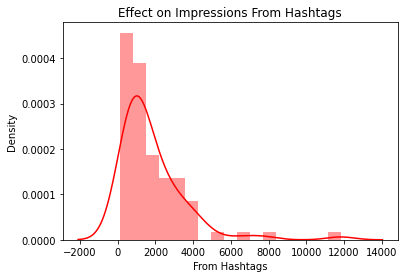

In [ ]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.title("Effect on Impressions From Hashtags")
sns.distplot(data['From Hashtags'], color = "red")
plt.show()

## *   Effect on Instagram Post Impression from Home Page (A feature in Instagram)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


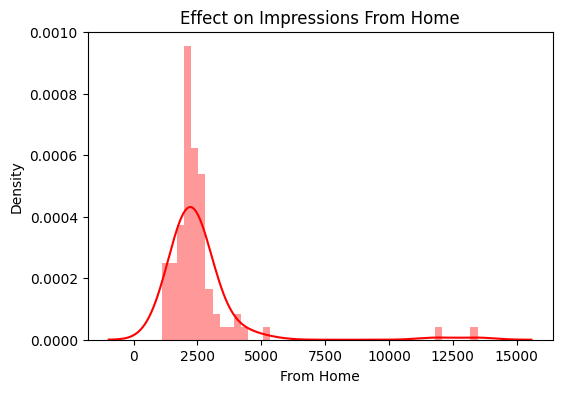

In [ ]:
plt.figure(figsize=(6, 4))
# plt.style.use('fivethirtyeight')
plt.style.use('default')
plt.title("Effect on Impressions From Home")
sns.distplot(data['From Home'], color = "red")
plt.show()

### *   Effect on Instagram Post Impression from Explore (A feature in Instagram)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


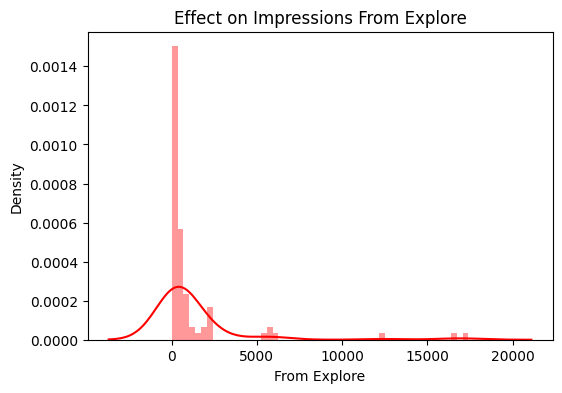

In [ ]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.rcParams['grid.color'] = 'k'
plt.title("Effect on Impressions From Explore")
sns.distplot(data['From Explore'], color = "red")
plt.show()

### Complete Data Visualisation to understand division of data on differnet istagram features

In [ ]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['Home','Hashtags','Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title='Impressions on Posts From Instagram Features', hole=0.25,width=500, height=500)

fig.show()

### Stopwords, most common used in Posts Captions

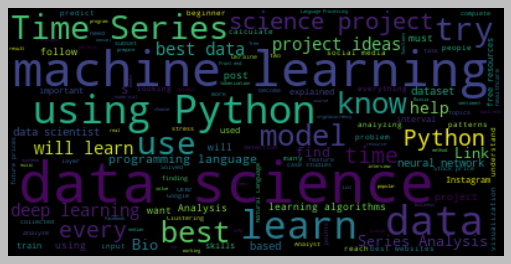

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.style.use('classic')
plt.figure( figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Stopwords, most common used in Posts Hashtags

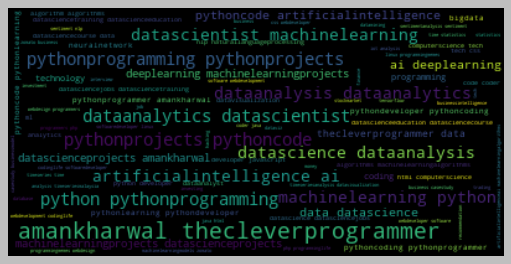

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Impressions on Posts are most important thing for any campaign.
 

# Data Visualisation of Relationships of Different Attributes with Impressions



## *   Relationship Between Likes and Impressions


In [ ]:
plt.figure(figsize=(10, 8))
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",  trendline_scope="overall",  trendline_color_override="black", color_discrete_sequence=['red'],
                    title = "Relationship Between Likes and Impressions",
                    width=800,
                    height=500)
figure.show()

<Figure size 800x640 with 0 Axes>

## *   Relationship Between Share and Impressions

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",  trendline_scope="overall",  trendline_color_override="black", color_discrete_sequence=['red'],
                    title = "Relationship Between Shares and Impressions",
                    width=800,
                    height=500)
figure.show()

## *   Relationship Between Comments and Impressions

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", trendline_scope="overall",  trendline_color_override="black", color_discrete_sequence=['red'],
                    title = "Relationship Between Comments and Impressions",
                    width=800,
                    height=500)
figure.show()

## *   Relationship Between Saved Posts and Impressions

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",  trendline_scope="overall",  trendline_color_override="black", color_discrete_sequence=['red'],
                    title = "Relationship Between Saved Posts and Impressions",
                    width=800,
                    height=500)
figure.show()

## Correlation of Impressions on a post with other attributes

In [ ]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Follows           0.941202
From Explore      0.908189
From Home         0.892918
Likes             0.856155
Saves             0.801936
Profile Visits    0.768840
Shares            0.673775
From Other        0.640388
From Hashtags     0.514576
Comments         -0.059999
Name: Impressions, dtype: float64


# Conversion Rate



### *   Rate of "User Followed the profile / Total Profile visits"



In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

43.85669632123106


### * Relationship Between Profile Visits and Followers Gained - Conversion Rate


In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",  trendline_scope="overall",  trendline_color_override="black", color_discrete_sequence=['green'],
                    title = "Relationship Between Profile Visits and Followers Gained",
                    width=800,
                    height=500)
figure.show()

# **2 - Data Modelling & Machine Learning**

## Division of Data Into Arrays for train


In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])


##Data Splitting into Training and Testing Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.3, 
                                                random_state=0)

# Testing 3 Different Models

## 1 - Passive Aggressive Regression                                                      
## 2 - Linear Regression                                
## 3 - Polynomial Regression with Degree 2 (Quadratic)

### 1 - Passive Aggressive Regression

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7902092672006692

### 2 - Linear Regression

In [ ]:
#Fitting the Linear Regression to the dataset  
p

0.8432451783075576

### 3 - Polynomial Regression for Degree 2 (Quadratic)

In [ ]:
#Fitting the Linear Regression to the dataset  
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(xtrain)

quad_model = LinearRegression()
quad_model.fit(x_poly, ytrain)
y_poly_pred = quad_model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(ytrain,y_poly_pred))
r2 = r2_score(ytrain,y_poly_pred)
print('Root Mean Square Error: ', rmse)
print('R2 Score: ',r2)

Root Mean Square Error:  455.4196351382433
R2 Score:  0.9907455682805598


## Predicting Number of Impressions on Posts Using Trained Models

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
poly_reg = PolynomialFeatures(degree=2)
likes = input('Likes: ')
saves = input('Saves: ')
comments = input('Comments: ')
shares = input('Shares: ')
profile_visits = input('Profile Visits: ')
follows = input('Followers Gained: ')
features = np.array([[likes,saves,comments,shares,profile_visits,follows]])
# print(f'Expected number of impressions are: ',{int(quad_model.predict(features)[0])})
print(f'Expected number of impressions by Passive Aggressive Regressor are: {int(model.predict(features)[0])}')
print(f'Expected number of impressions by Linear Regression are: {int(lin_regs.predict(features)[0])}')
print(f'Expected number of impressions by Quadratic Regression are: {int(quad_model.predict(poly_reg.fit_transform(features)))}')


Likes: 5000
Saves: 600
Comments: 385
Shares: 350
Profile Visits: 900
Followers Gained: 60
Expected number of impressions by Passive Aggressive Regressor are: 133528
Expected number of impressions by Linear Regression are: 103740
Expected number of impressions by Quadratic Regression are: 1914696


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

